# CNN 2 (Schrauben)

In [2]:
import numpy as np
from numpy import load
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import plot_model
from myst_nb import glue

## Datensatz laden

In [4]:
X_train = load('../01_Dataset/Dataset_224x224/X_train.npy').astype(np.float32).reshape(-1, 224,224,1)
y_train = load('../01_Dataset/Dataset_224x224/y_train.npy')

X_test=load('../01_Dataset/Dataset_224x224/X_test.npy').astype(np.float32).reshape(-1,224,224,1)
y_test=load('../01_Dataset/Dataset_224x224/y_test.npy').astype(np.int32)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('X_train shape:'+ str(X_train.shape))
print('y_train shape:'+ str(y_train.shape))

X_train shape:(7560, 224, 224, 1)
y_train shape:(7560, 6)


## Bilder anzeigen

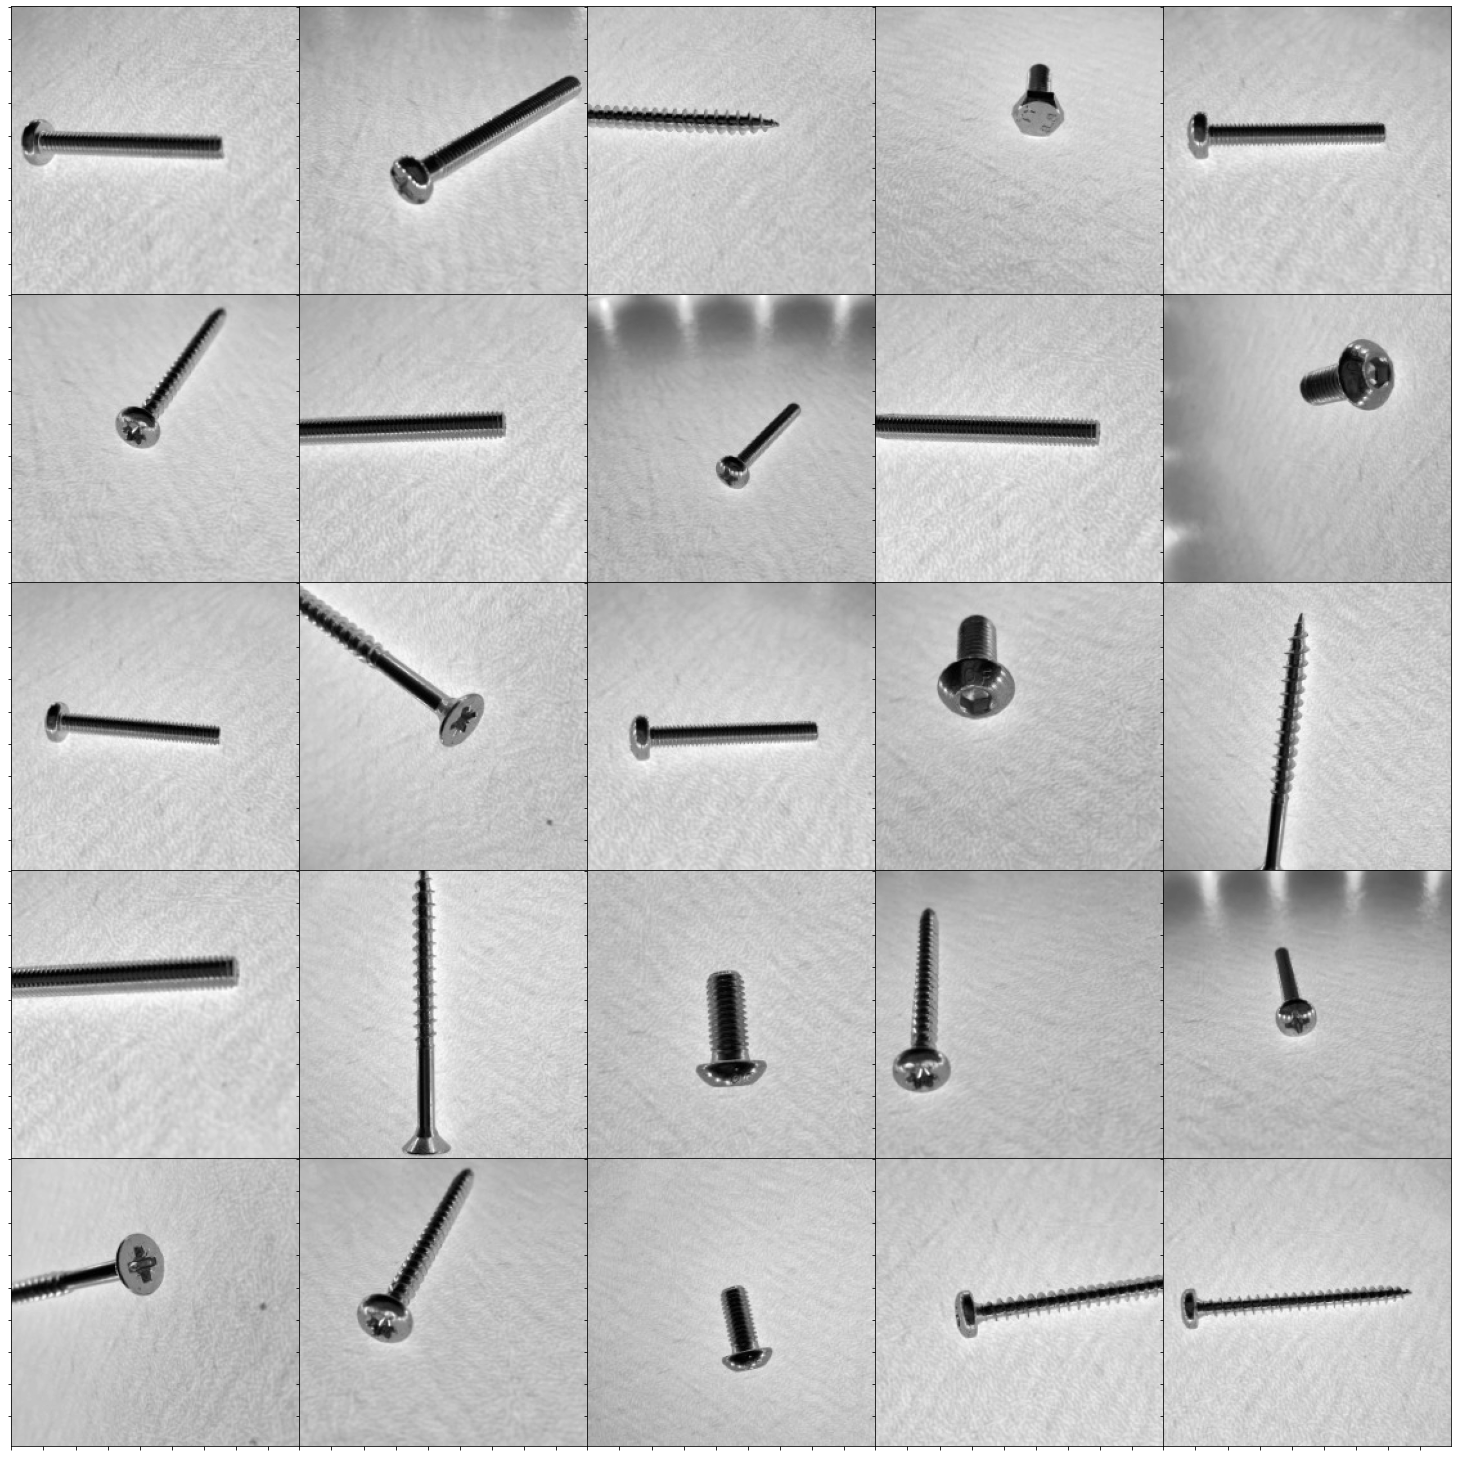

In [4]:
import matplotlib.pyplot as plt
from matplotlib import gridspec

nrow = 5
ncol = 5


fig = plt.figure(figsize=(24, 24)) 

gs = gridspec.GridSpec(nrow, ncol,
         wspace=0.0, hspace=0.0, 
         top=1.-0.5/(nrow+1), bottom=0.5/(nrow+1), 
         left=0.5/(ncol+1), right=1-0.5/(ncol+1)) 
im = 0
for i in range(nrow):
    for j in range(ncol):
        ax= plt.subplot(gs[i,j])
        ax.imshow(X_train[im,:,:,0],cmap='gray')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        im +=1

plt.show()

## Vergleich der CNN Modelle

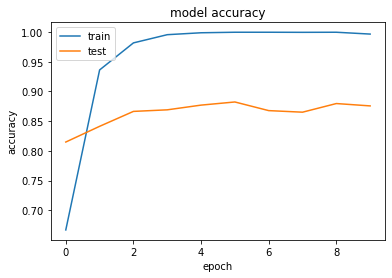

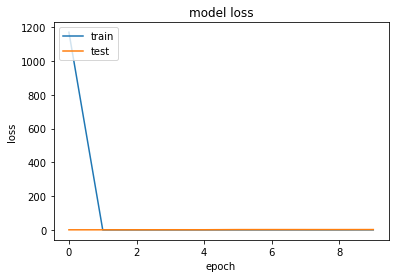

In [8]:
#Modell laden
model = load_model('models/1Conv2d_10_3x3_relu.h5')
history = np.load('models/1Conv2d_10_3x3_relu.npy',allow_pickle='TRUE').item()

accuracy = history['accuracy']
val_accuracy = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']


# Visualize the historgram with the intervals
fig1, ax = plt.subplots()
ax.plot(accuracy)
ax.plot(val_accuracy)
ax.set_title("model accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

glue("acc_fig1", fig1, display=False)

# Visualize the historgram with the intervals
fig2, ax = plt.subplots()
ax.plot(loss)
ax.plot(val_loss)
ax.set_title("model loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

glue("loss_fig1", fig2, display=False)

eval = model.evaluate(X_test,y_test,verbose=0,return_dict=True)
loss_eval_A = eval['loss']
glue("loss_eval_A", loss_eval_A, display=False)
acc_eval_A = eval['accuracy']
glue("acc_eval_A", acc_eval_A, display=False)

# model = Sequential()
# model.add(Conv2D(10, kernel_size=(3, 3), activation="relu", input_shape=(224, 224, 1)))
# model.add(Flatten())
# model.add(Dense(6, activation="softmax"))
# plot_model(model, to_file='model_1_plot.png', show_shapes=True, show_layer_names=True)

````{tabbed} Modell A


```python
# Modell Aufbau
model = Sequential()
model.add(Conv2D(10, kernel_size=(3, 3), activation="relu", input_shape=(224, 224, 1)))
model.add(Flatten())
model.add(Dense(6, activation="softmax"))
```


```python
# Modell trainieren
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=100)
```




```python
# Modell Speichern:
if os.path.isfile('models/1Conv2d_10_3x3_relu.h5') is False:
  model.save('models/1Conv2d_10_3x3_relu.h5')

np.save('models/1Conv2d_10_3x3_relu.npy',history.history)

```

````

````{tabbed} Architektur

```{figure} images/model_1_plot.png
---
height: 350px
name: model-fig
---

```

````

````{tabbed} Evaluierung
|                        |                |                  
|:-------------------------------:|:---------------------------:|
| {glue:}`acc_fig1`          | {glue:}`loss_fig1`                   |
|<center>Die erreichte Genauigkeit beträgt: {glue:text}`acc_eval_A:.3f`</center>   |<center> Der Loss: {glue:text}`loss_eval_A:.2f`</center> |

````
````{tabbed} Confusion Matrix
```{figure} images/1Conv2d_10_3x3_relu_confMat.png
---

align: center
name: model-fig
---

```

````


$~$

In [ ]:
#Modell B laden
model = load_model('models/1Conv2d_10_3x3_relu_Ep=30.h5')
history = np.load('models/1Conv2d_10_3x3_relu_Ep=30.npy',allow_pickle='TRUE').item()

accuracy = history['accuracy']
val_accuracy = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']


# Visualize the historgram with the intervals
fig1, ax = plt.subplots()
ax.plot(accuracy)
ax.plot(val_accuracy)
ax.set_title("model accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

glue("acc_figB", fig1, display=False)

# Visualize the historgram with the intervals
fig2, ax = plt.subplots()
ax.plot(loss)
ax.plot(val_loss)
ax.set_title("model loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

glue("loss_figB", fig2, display=False)

# Evaluierung & glue
eval = model.evaluate(X_test,y_test,verbose=0,return_dict=True)
loss_eval_B = eval['loss']
glue("loss_eval_B", loss_eval_B, display=False)
acc_eval_B = eval['accuracy']
glue("acc_eval_B", acc_eval_B, display=False)

$~$

````{tabbed} Modell B


```python
# Modell Aufbau
model = Sequential()
model.add(Conv2D(10, kernel_size=(3, 3), activation="relu", input_shape=(224, 224, 1)))
model.add(Flatten())
model.add(Dense(6, activation="softmax"))
```


```python
# Modell trainieren
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, validation_split=0.1, epochs=30, batch_size=100)
```




```python
# Modell Speichern
if os.path.isfile('models/1Conv2d_10_3x3_relu_Ep=30.h5') is False:
  model.save('models/1Conv2d_10_3x3_relu_Ep=30.h5')

np.save('models/1Conv2d_10_3x3_relu_Ep=30.npy',history.history)

```

````

````{tabbed} Architektur

```{figure} images/model_1_plot.png
---
height: 350px
name: model_B-fig
---

```

````

````{tabbed} Evaluierung
|                        |                |                  
|:-------------------------------:|:---------------------------:|
| {glue:}`acc_figB`          | {glue:}`loss_figB`                   |
|<center>Die erreichte Genauigkeit beträgt: {glue:text}`acc_eval_B:.3f`</center>   |<center> Der Loss: {glue:text}`loss_eval_B:.2f`</center> |


````
````{tabbed} Confusion Matrix
```{figure} images/1Conv2d_10_3x3_relu_confMat.png
---

align: center
name: model-fig
---

```

````

$~$

In [ ]:
#Modell C laden
model = load_model('models/1Conv2d_10_3x3_MaxP_2x2.h5')
history = np.load('models/1Conv2d_10_3x3_MaxP_2x2.npy',allow_pickle='TRUE').item()

accuracy = history['accuracy']
val_accuracy = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

# Visualize the historgram with the intervals
fig1, ax = plt.subplots()
ax.plot(accuracy)
ax.plot(val_accuracy)
ax.set_title("model accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

glue("acc_figC", fig1, display=False)

# Visualize the historgram with the intervals
fig2, ax = plt.subplots()
ax.plot(loss)
ax.plot(val_loss)
ax.set_title("model loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

glue("loss_figC", fig2, display=False)

eval = model.evaluate(X_test,y_test,verbose=0,return_dict=True)
loss_eval_C = eval['loss']
glue("loss_eval_C", loss_eval_C, display=False)
acc_eval_C = eval['accuracy']
glue("acc_eval_C", acc_eval_C, display=False)

print(model.evaluate(X_test,y_test,verbose=0))

#model = Sequential()
#model.add(Conv2D(10, kernel_size=(3, 3), activation="relu", input_shape=(224,224,1,)))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Flatten())
#model.add(Dense(6, activation="softmax"))
#plot_model(model, to_file='model_C_plot.png', show_shapes=True, show_layer_names=True)

````{tabbed} Modell C


```python
# Modell Aufbau
model = Sequential()
model.add(Conv2D(10, kernel_size=(3, 3), activation="relu", input_shape=(224,224,1,)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(6, activation="softmax"))
```


```python
# Modell trainieren
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=100)
```




```python
# Modell Speichern
if os.path.isfile('models/1Conv2d_10_3x3_MaxP_2x2.h5') is False:
  model.save('models/1Conv2d_10_3x3_MaxP_2x2.h5')
np.save('models/1Conv2d_10_3x3_MaxP_2x2.npy',history.history)

```

````

````{tabbed} Architektur

```{figure} images/model_C_plot.png
---
height: 350px
name: modelB-fig
---

```

````

````{tabbed} Evaluierung
|                        |                |                  
|:-------------------------------:|:---------------------------:|
| {glue:}`acc_figC`          | {glue:}`loss_figC`                   |
|<center>Die erreichte Genauigkeit beträgt: {glue:text}`acc_eval_C:.3f`</center>   |<center> Der Loss: {glue:text}`loss_eval_C:.2f`</center> |


````
````{tabbed} Confusion Matrix
```{figure} images/1Conv2d_10_3x3_MaxP_2x2_confMat.png
---

align: center
name: model-fig
---

```

````


$~$

[1.5290782451629639, 0.9429012537002563]


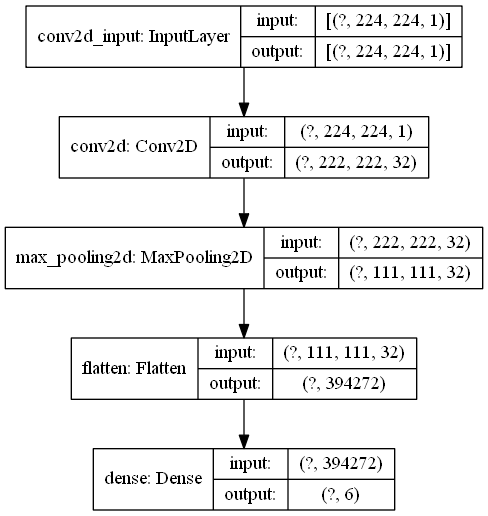

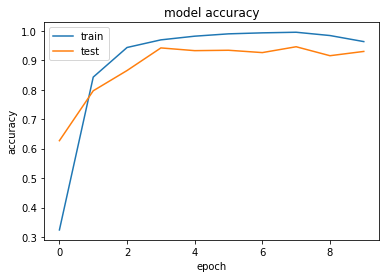

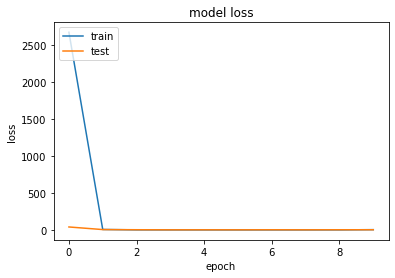

In [9]:
#Modell laden
model = load_model('models/1Conv2d_32_3x3_MaxP_2x2.h5')
history = np.load('models/1Conv2d_32_3x3_MaxP_2x2.npy',allow_pickle='TRUE').item()

accuracy = history['accuracy']
val_accuracy = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']


# Visualize the historgram with the intervals
fig1, ax = plt.subplots()
ax.plot(accuracy)
ax.plot(val_accuracy)
ax.set_title("model accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

glue("acc_figD", fig1, display=False)

# Visualize the historgram with the intervals
fig2, ax = plt.subplots()
ax.plot(loss)
ax.plot(val_loss)
ax.set_title("model loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

glue("loss_figD", fig2, display=False)

eval = model.evaluate(X_test,y_test,verbose=0,return_dict=True)
loss_eval_D = eval['loss']
glue("loss_eval_D", loss_eval_D, display=False)
acc_eval_D = eval['accuracy']
glue("acc_eval_D", acc_eval_D, display=False)

print(model.evaluate(X_test,y_test,verbose=0))

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(224,224,1,)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(6, activation="softmax"))
plot_model(model, to_file='model_D_plot.png', show_shapes=True, show_layer_names=True)

````{tabbed} Modell D


```python
# Modell Aufbau
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(224,224,1,)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(6, activation="softmax"))
```


```python
# Modell trainieren
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=100)
```




```python
# Modell Speichern
if os.path.isfile('models/1Conv2d_32_3x3_MaxP_2x2.h5') is False:
  model.save('models/1Conv2d_32_3x3_MaxP_2x2.h5')
np.save('models/history_1Conv2d_32_3x3_MaxP_2x2.npy',history.history)

```

````

````{tabbed} Architektur

```{figure} images/model_D_plot.png
---
height: 350px
name: modelD-fig
---

```

````

````{tabbed} Evaluierung
|                        |                |                  
|:-------------------------------:|:---------------------------:|
| {glue:}`acc_figD`          | {glue:}`loss_figD`                   |
|<center>Die erreichte Genauigkeit beträgt: {glue:text}`acc_eval_D:.3f`</center>   |<center> Der Loss: {glue:text}`loss_eval_D:.2f`</center> |

````
````{tabbed} Confusion Matrix
```{figure} images/1Conv2d_32_3x3_MaxP_2x2_confMat.png
---
align: center
name: model-fig
---

````


$~$

[2.3003478050231934, 0.8993827104568481]


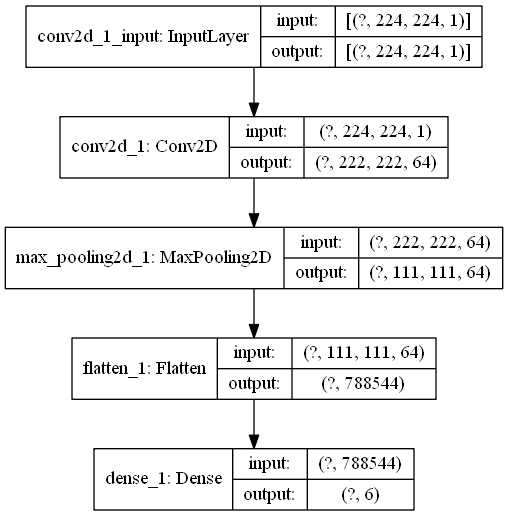

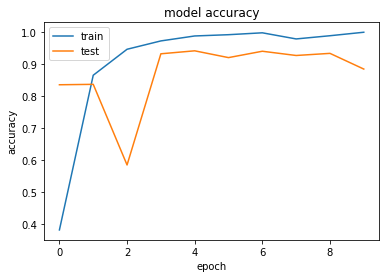

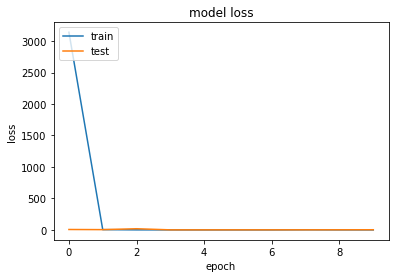

In [10]:
#Modell laden
model = load_model('models/1Conv2d_64_3x3_MaxP_2x2.h5')
history = np.load('models/1Conv2d_64_3x3_MaxP_2x2.npy',allow_pickle='TRUE').item()

accuracy = history['accuracy']
val_accuracy = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

# Visualize the historgram with the intervals
fig1, ax = plt.subplots()
ax.plot(accuracy)
ax.plot(val_accuracy)
ax.set_title("model accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

glue("acc_figE", fig1, display=False)

# Visualize the historgram with the intervals
fig2, ax = plt.subplots()
ax.plot(loss)
ax.plot(val_loss)
ax.set_title("model loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

glue("loss_figE", fig2, display=False)

eval = model.evaluate(X_test,y_test,verbose=0,return_dict=True)
loss_eval_E = eval['loss']
glue("loss_eval_E", loss_eval_E, display=False)
acc_eval_E = eval['accuracy']
glue("acc_eval_E", acc_eval_E, display=False)

print(model.evaluate(X_test,y_test,verbose=0))

model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu", input_shape=(224,224,1,)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(6, activation="softmax"))

plot_model(model, to_file='model_E_plot.png', show_shapes=True, show_layer_names=True)

````{tabbed} Modell E


```python
# Modell Aufbau
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu", input_shape=(224,224,1,)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(6, activation="softmax"))
```


```python
# Modell trainieren
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=100)
```




```python
# Modell Speichern
if os.path.isfile('models/1Conv2d_64_3x3_MaxP_2x2.h5') is False:
  model.save('models/1Conv2d_64_3x3_MaxP_2x2.h5')
np.save('models/history_1Conv2d_64_3x3_MaxP_2x2.npy',history.history)

```

````

````{tabbed} Architektur

```{figure} images/model_E_plot.png
---
height: 350px
name: modelE-fig
---

```

````

````{tabbed} Evaluierung
|                        |                |                  
|:-------------------------------:|:---------------------------:|
| {glue:}`acc_figE`          | {glue:}`loss_figE`                   |
|<center>Die erreichte Genauigkeit beträgt: {glue:text}`acc_eval_E:.3f`</center>   |<center> Der Loss: {glue:text}`loss_eval_E:.2f`</center> |
````
````{tabbed} Confusion Matrix
```{figure} images/1Conv2d_32_3x3_MaxP_2x2_confMat.png
---
align: center
name: model-fig
---

````

## Dropout

Es könnte sein, dass das CNN bestimmte Verbindungen besonders hoch gewichtet wie z.$~$B Bildinhalte, die nicht zum Objekt gehören. Mit Dropout werden Verbindungen unterbrochen, womit das Training „erschwert“ wird. Das bringt ein robusteres Modell hervor, welches auf den Testdaten eine höhere Genauigkeit erreicht. Gerade bei vielen Features soll sich das CNN nicht nur auf wenige Merkmale „fixieren“, obwohl dies zu einer höheren Trainingsgenauigkeit führen würde.

[107.75885772705078, 0.8570987582206726]


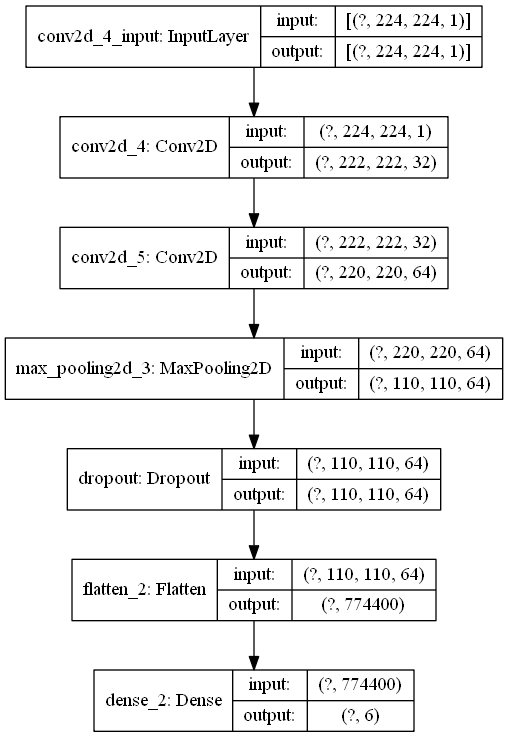

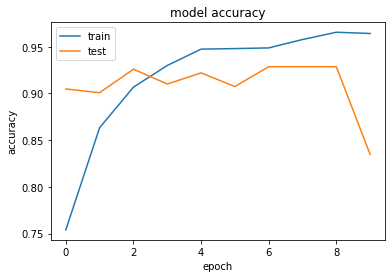

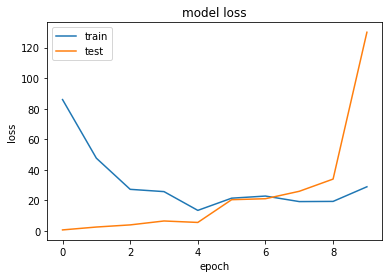

In [13]:
#Modell laden
model = load_model('models/2Conv2d_1MaxP_1dropout.h5')
history = np.load('models/2Conv2d_1MaxP_1dropout.npy',allow_pickle='TRUE').item()

accuracy = history['accuracy']
val_accuracy = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']


# Visualize the historgram with the intervals
fig1, ax = plt.subplots()
ax.plot(accuracy)
ax.plot(val_accuracy)
ax.set_title("model accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

glue("acc_figF", fig1, display=False)

# Visualize the historgram with the intervals
fig2, ax = plt.subplots()
ax.plot(loss)
ax.plot(val_loss)
ax.set_title("model loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

glue("loss_figF", fig2, display=False)

# eval
eval = model.evaluate(X_test,y_test,verbose=0,return_dict=True)
loss_eval_F = eval['loss']
glue("loss_eval_F", loss_eval_F, display=False)
acc_eval_F = eval['accuracy']
glue("acc_eval_F", acc_eval_F, display=False)

print(model.evaluate(X_test,y_test,verbose=0))

# model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(224, 224, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(6, activation="softmax"))
plot_model(model, to_file='model_F_plot.png', show_shapes=True, show_layer_names=True)

````{tabbed} Modell F


```python
# Modell Aufbau
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(224, 224, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(6, activation="softmax"))
```


```python
# Modell trainieren
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=100)
```




```python
# Modell Speichern
if os.path.isfile('models/2Conv2d_1MaxP_1dropout.h5') is False:
  model.save('models/2Conv2d_1MaxP_1dropout.h5')
np.save('models/history_2Conv2d_1MaxP_1dropout.npy',history.history)

```

````

````{tabbed} Architektur

```{figure} images/model_F_plot.png
---
height: 700px
name: modelF-fig
---

```

````

````{tabbed} Evaluierung
|                        |                |                  
|:-------------------------------:|:---------------------------:|
| {glue:}`acc_figF`          | {glue:}`loss_figF`                   |
|<center>Die erreichte Genauigkeit beträgt: {glue:text}`acc_eval_F:.3f`</center>   |<center> Der Loss: {glue:text}`loss_eval_F:.2f`</center> |
````
````{tabbed} Confusion Matrix
```{figure} images/2Conv2d_1MaxP_1dropout_confMat.png
---
align: center
name: model-fig
---

````

$~$

[0.11454851180315018, 0.9913580417633057]


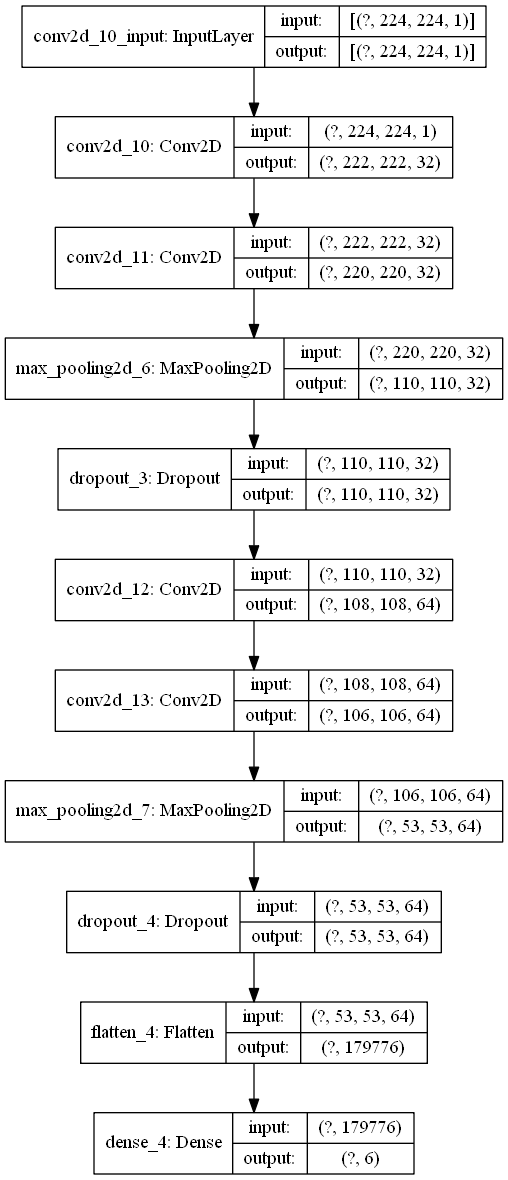

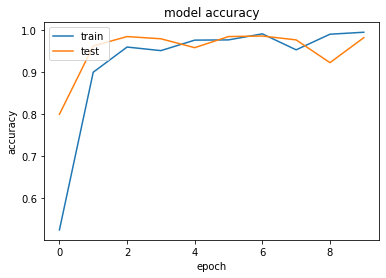

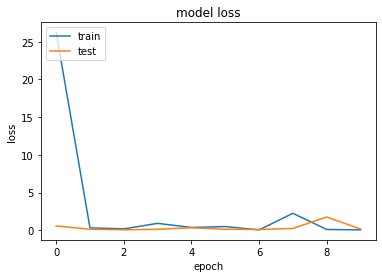

In [15]:
#Modell laden
model = load_model('models/4Conv2d_2MaxP_2dropout.h5')
history = np.load('models/4Conv2d_2MaxP_2dropout.npy',allow_pickle='TRUE').item()


accuracy = history['accuracy']
val_accuracy = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']


# Visualize the historgram with the intervals
fig1, ax = plt.subplots()
ax.plot(accuracy)
ax.plot(val_accuracy)
ax.set_title("model accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

glue("acc_figG", fig1, display=False)

# Visualize the historgram with the intervals
fig2, ax = plt.subplots()
ax.plot(loss)
ax.plot(val_loss)
ax.set_title("model loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

glue("loss_figG", fig2, display=False)

# eval
eval = model.evaluate(X_test,y_test,verbose=0,return_dict=True)
loss_eval_G = eval['loss']
glue("loss_eval_G", loss_eval_G, display=False)
acc_eval_G = eval['accuracy']
glue("acc_eval_G", acc_eval_G, display=False)

print(model.evaluate(X_test,y_test,verbose=0))

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(224, 224, 1)))
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(6, activation="softmax"))

plot_model(model, to_file='model_G_plot.png', show_shapes=True, show_layer_names=True)

````{tabbed} Modell F


```python
# Modell Aufbau
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(224, 224, 1)))
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(6, activation="softmax"))
```


```python
# Modell trainieren
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=100)
```




```python
# Modell Speichern
if os.path.isfile('models/4Conv2d_2MaxP_2dropout.h5') is False:
  model.save('models/4Conv2d_2MaxP_2dropout.h5')
np.save('models/history_4Conv2d_2MaxP_2dropout.npy',history.history)

```

````

````{tabbed} Architektur

```{figure} images/model_G_plot.png
---
height: 700px
name: modelG-fig
---

```

````

````{tabbed} Evaluierung
|                        |                |                  
|:-------------------------------:|:---------------------------:|
| {glue:}`acc_figG`          | {glue:}`loss_figG`                   |
|<center>Die erreichte Genauigkeit beträgt: {glue:text}`acc_eval_G:.3f`</center>   |<center> Der Loss: {glue:text}`loss_eval_G:.2f`</center> |
````
````{tabbed} Confusion Matrix
```{figure} images/4Conv2d_2MaxP_2dropout_confMat.png
---
align: center
name: model-fig
---

````

$~$

[0.3592555522918701, 0.989506185054779]


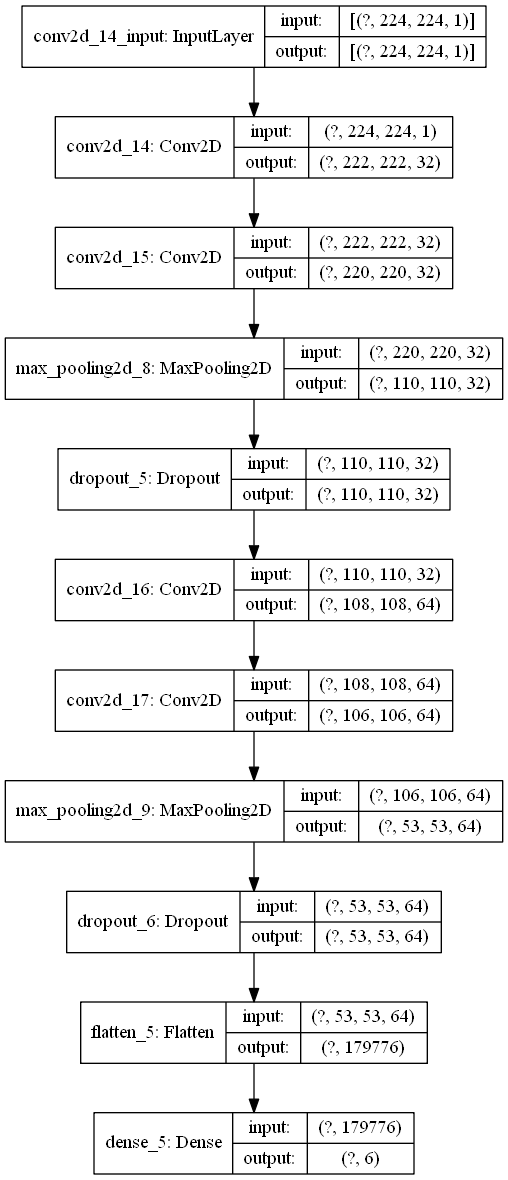

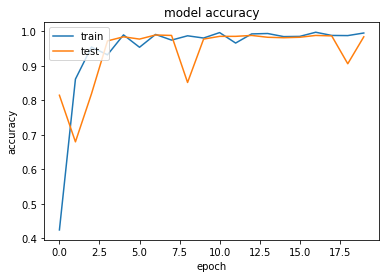

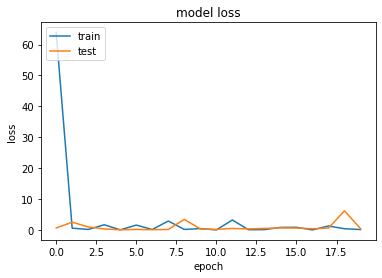

In [16]:
#Modell laden
model = load_model('models/4Conv2d_2MaxP_2dropout_Ep=20.h5')
history = np.load('models/4Conv2d_2MaxP_2dropout_Ep=20.npy',allow_pickle='TRUE').item()


accuracy = history['accuracy']
val_accuracy = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

# Visualize the historgram with the intervals
fig1, ax = plt.subplots()
ax.plot(accuracy)
ax.plot(val_accuracy)
ax.set_title("model accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

glue("acc_figH", fig1, display=False)

# Visualize the historgram with the intervals
fig2, ax = plt.subplots()
ax.plot(loss)
ax.plot(val_loss)
ax.set_title("model loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

glue("loss_figH", fig2, display=False)

# eval
eval = model.evaluate(X_test,y_test,verbose=0,return_dict=True)
loss_eval_H = eval['loss']
glue("loss_eval_H", loss_eval_H, display=False)
acc_eval_H = eval['accuracy']
glue("acc_eval_H", acc_eval_H, display=False)

print(model.evaluate(X_test,y_test,verbose=0))

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(224, 224, 1)))
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(6, activation="softmax"))

plot_model(model, to_file='model_H_plot.png', show_shapes=True, show_layer_names=True)

````{tabbed} Modell H


```python
# Modell Aufbau
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(224, 224, 1)))
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(6, activation="softmax"))
```


```python
# Modell trainieren
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, validation_split=0.1, epochs=20, batch_size=100)
```




```python
# Modell Speichern
if os.path.isfile('models/4Conv2d_2MaxP_2dropout_Ep=20.h5') is False:
  model.save('models/4Conv2d_2MaxP_2dropout_Ep=20.h5')
np.save('models/history_4Conv2d_2MaxP_2dropout_Ep=20.npy',history.history)

```

````

````{tabbed} Architektur

```{figure} images/model_H_plot.png
---
height: 700px
name: modelH-fig
---

```

````

````{tabbed} Evaluierung
|                        |                |                  
|:-------------------------------:|:---------------------------:|
| {glue:}`acc_figH`          | {glue:}`loss_figH`                   |
|<center>Die erreichte Genauigkeit beträgt: {glue:text}`acc_eval_H:.3f`</center>   |<center> Der Loss: {glue:text}`loss_eval_H:.2f`</center> |

````
````{tabbed} Confusion Matrix
```{figure} images/4Conv2d_2MaxP_2dropout_Epoch=30_confMat.png
---
align: center
name: model-fig
---

```
````

## Fazit

Das Ziel dieser Masterarbeit war es, mit Hilfe von künstlichen neuronalen Netzen, eine Bilderkennung zu entwickeln. Dabei hat sich gezeigt, dass die Beschaffung der Daten für einen Trainingsdatensatz, den größten Anteil am Gesamtaufwand ausmacht. 

Für die Anwendung in einem Sortierroboter, sollten die Modelle unabhängig von der Beleuchtung und dem Schattenwurf, in der Lage sein, die Schrauben zu erkennen.

In dieser Arbeit, die den Weg für Weiterentwicklungen bereiten sollte, wurden eine Beleuchtungsstation entwickelt um einen Schattenwurf zu vermeiden.
